# Projeto 3 - Ciência dos dados 

###### Nomes: Gustavo, Matheus, Pedro Carani e Thiago David

# Modelo preditivo do indíce Ibovespa baseado no preço da ITSA (Itaúsa) utilizando a analíse de Regressão linear.




## Sobre o nosso Modelo:


 ### Os dados foram coletados do site https://finance.yahoo.com/:

     - Ibovespa (2018-2019)
     - ITSA4 (2018-2019)
     
     
     
   

### Por que usar a ITSA como variável explicativa?

#### A ITSA possui um peso relativamente alto na composição do IBOV (cerca de 3,5%), além disso, ela possui uma correlaçao alta (cerca de 0.86)

## Nosso modelo:

## Importando bibliotecas: 

In [170]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from scipy.stats import norm 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import seaborn as sns


## Lendo os arquivos de dados:

In [171]:
ibov=pd.read_csv("bov.csv")
itsa=pd.read_csv("ITSA4.SA.csv")


# Análise exploratória dos dados:

## Dados do Ibovespa

In [172]:
ibov.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-08,87719.0,88570.0,85620.0,85620.0,85620.0,5297700
1,2018-11-09,85620.0,86233.0,84030.0,85641.0,85641.0,4814400
2,2018-11-12,85644.0,86227.0,85009.0,85525.0,85525.0,3534000
3,2018-11-13,85531.0,85941.0,84071.0,84914.0,84914.0,4410700
4,2018-11-14,84898.0,85973.0,84267.0,85973.0,85973.0,5591600


In [173]:
ibov["Adj Close"]

0       85620.000000
1       85641.000000
2       85525.000000
3       84914.000000
4       85973.000000
           ...      
244    108601.000000
245    108451.000000
246    108336.000000
247    109581.000000
248    108884.710938
Name: Adj Close, Length: 249, dtype: float64

## Dados da ITSA

In [174]:
itsa.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-08,11.62,11.69,11.30,11.30,10.670288,21424800
1,2018-11-09,11.28,11.56,11.21,11.55,10.906357,16869800
2,2018-11-12,11.56,11.57,11.38,11.44,10.802484,14895600
3,2018-11-13,11.50,11.55,11.24,11.36,10.726945,18626600
4,2018-11-14,11.36,11.55,11.31,11.55,10.906357,17762600


In [175]:
itsa["Adj Close"]

0      10.670288
1      10.906357
2      10.802484
3      10.726945
4      10.906357
         ...    
244    13.900000
245    14.070000
246    13.960000
247    13.940000
248    13.810000
Name: Adj Close, Length: 249, dtype: float64

## Criando um novo Dataset com apenas as informações necessárias (fechamento) para a análise:

In [176]:
ibov=pd.DataFrame(ibov, columns=['Date','Adj Close'])
itsa=pd.DataFrame(itsa, columns=['Adj Close'])


In [177]:
ibov.head()

,Date,Adj Close
0,2018-11-08,85620.0
1,2018-11-09,85641.0
2,2018-11-12,85525.0
3,2018-11-13,84914.0
4,2018-11-14,85973.0


In [178]:
date=ibov['Date']
pontos=ibov['Adj Close']
preco=itsa['Adj Close']

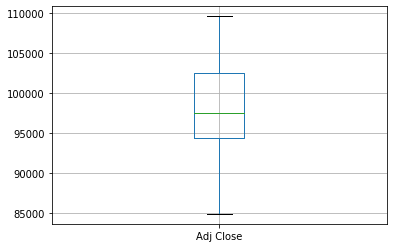

In [179]:
ibov.boxplot();

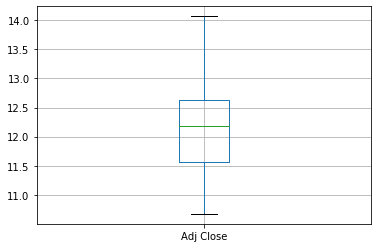

In [180]:
itsa.boxplot();

## Join dos dois Dataset (Ibov e ITSA)

In [181]:
dados=ibov.join(itsa, lsuffix='_ibov', rsuffix='_itsa')

# Correlação 

In [182]:
dados.corr()

,Adj Close_ibov,Adj Close_itsa
Adj Close_ibov,1.00000,0.86579
Adj Close_itsa,0.86579,1.00000


In [183]:
dados.head()

,Date,Adj Close_ibov,Adj Close_itsa
0,2018-11-08,85620.0,10.670288
1,2018-11-09,85641.0,10.906357
2,2018-11-12,85525.0,10.802484
3,2018-11-13,84914.0,10.726945
4,2018-11-14,85973.0,10.906357


In [184]:
dados.describe()

,Adj Close_ibov,Adj Close_itsa
count,249.000000,249.000000
mean,97595.508879,12.167305
std,5916.391315,0.756215
min,84914.000000,10.670288
25%,94389.000000,11.555626
50%,97457.000000,12.190315
75%,102551.000000,12.633587
max,109581.000000,14.070000


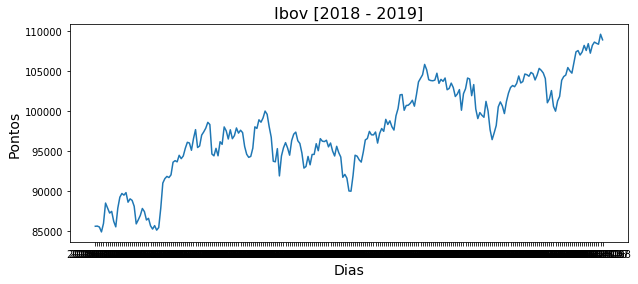

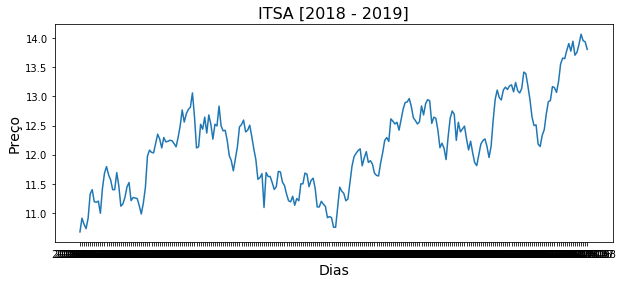

In [204]:
plt.figure(1, figsize=(10,4))
plt.plot(date, pontos)
plt.title('Ibov [2018 - 2019]', fontsize=16)
plt.xlabel('Dias', fontsize=14)
plt.ylabel('Pontos', fontsize=14)
plt.show();

plt.figure(1, figsize=(10,4))
plt.plot(date, preco)
plt.title('ITSA [2018 - 2019]', fontsize=16)
plt.xlabel('Dias', fontsize=14)
plt.ylabel('Preço', fontsize=14)
plt.show();

<Figure size 1152x720 with 0 Axes>

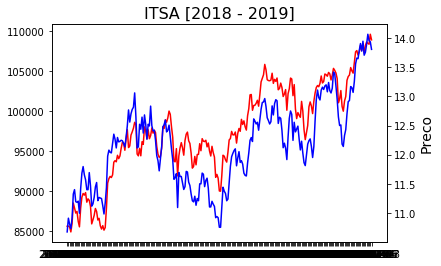

In [186]:
x=dados['Date']
y=[dados['Adj Close_ibov'], dados['Adj Close_itsa']]
plt.figure(1, figsize=(16,10))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y[0], 'r')
ax2.plot(x, y[1], 'b')
plt.title('ITSA [2018 - 2019]', fontsize=16)
plt.xlabel('Dias', fontsize=14)
plt.ylabel('Preco', fontsize=14)
plt.show();

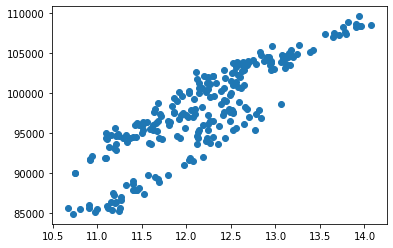

In [187]:
plt.scatter(y[1],y[0])


In [188]:
train, test = train_test_split(dados, test_size=0.20)

In [189]:
X_train = np.array(train['Adj Close_itsa']).reshape(-1, 1)
y_train = train['Adj Close_ibov']

In [190]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

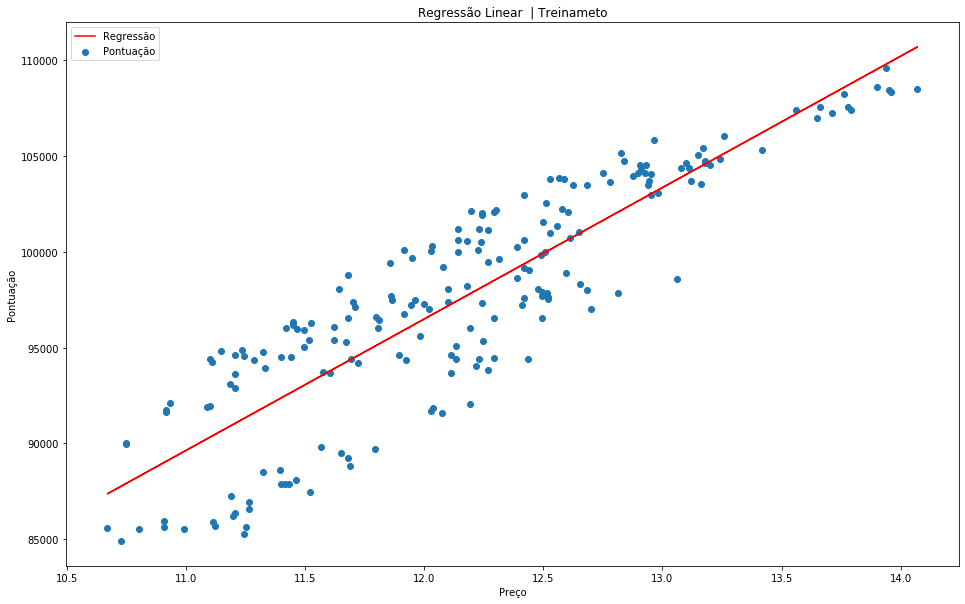

In [191]:
plt.figure(1, figsize=(16,10))
plt.title('Regressão Linear  | Treinameto' )
plt.scatter(X_train, y_train, label='Pontuação')
plt.plot(X_train, y_pred, color='r', label='Regressão')
plt.xlabel('Preço')
plt.ylabel('Pontuação')
plt.legend()
plt.show()

In [192]:
X_test = np.array(test['Adj Close_itsa']).reshape(-1, 1)
y_test = test['Adj Close_ibov']
y_pred = model.predict(X_test)

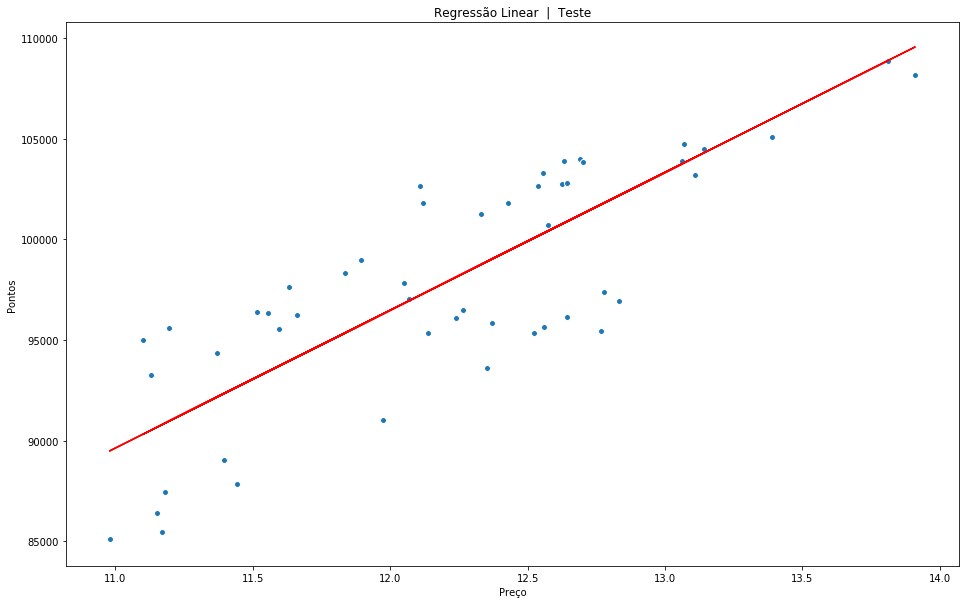

In [193]:
plt.figure(1, figsize=(16,10))
plt.title('Regressão Linear  |  Teste')
plt.plot(X_test,y_pred , color='r', label='Regressão')
plt.scatter(X_test, y_test, edgecolor='w', label='Pontos')
plt.xlabel('Preço')
plt.ylabel('Pontos')

plt.show()

In [194]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)


0.647695627593882

Ibov=B0+B1*ITSA+E

In [195]:
B1=np.asscalar(np.squeeze(model.coef_))
B0=np.squeeze(model.coef_)
itsafuturo=15.5

/Users/pedro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """Entry point for launching an IPython kernel.


In [196]:
ibovfuturo=B0+B1*itsafuturo

In [197]:
ibovfuturo

113026.49563838726

# Analise de residuos 

In [198]:
e=y_test-y_pred

In [199]:
mu, std = norm.fit(e)

AttributeError: 'tuple' object has no attribute 'plot'

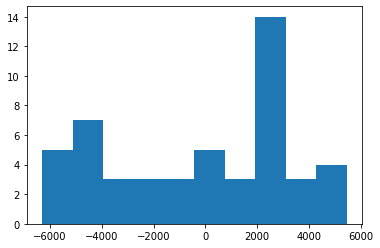

In [200]:

ax=plt.hist(e)

x=np.linspace(min(e), max(e))
p=norm.pdf(x, mu, std)
ax.plot(x, p)
plt.show()
